In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
import warnings 
import joblib

warnings.filterwarnings("ignore")

## Exploratory of dataset

In [2]:
for dirname, _, filenames in os.walk("titanic_data/"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic_data/test.csv
titanic_data/train.csv
titanic_data/gender_submission.csv


In [3]:
df_train = pd.read_csv("titanic_data/train.csv")
df_test = pd.read_csv("titanic_data/test.csv")

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


<Figure size 1000x800 with 0 Axes>

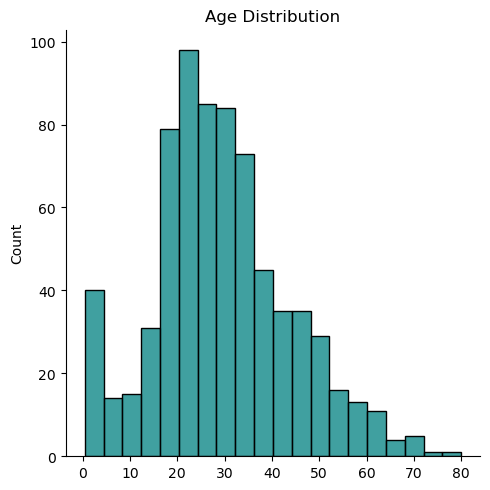

In [7]:
plt.figure(figsize = (10, 8))
sns.displot(x="Age", data=df_train, color="teal")
plt.xlabel("")
plt.title("Age Distribution")

plt.show()

<Figure size 1000x800 with 0 Axes>

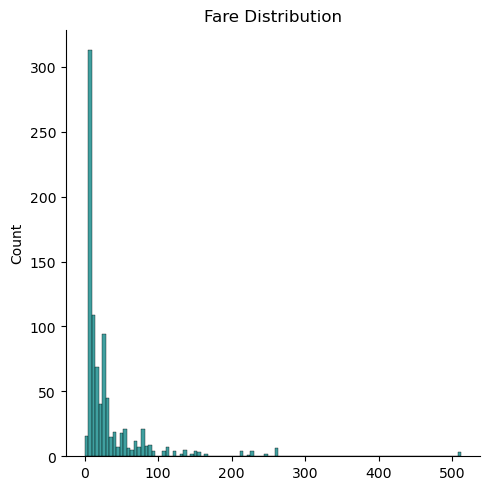

In [8]:
plt.figure(figsize=(10, 8))
sns.displot(data=df_train, x="Fare", color="teal")
plt.xlabel("")
plt.title("Fare Distribution")

plt.show()

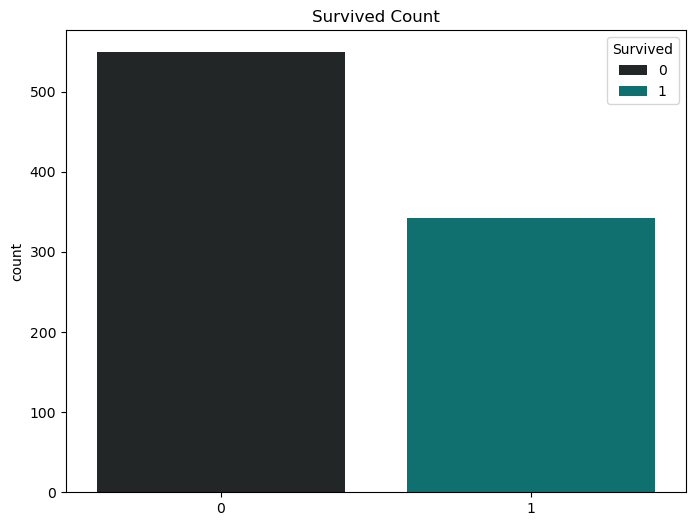

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Survived", data=df_train, color="teal", hue="Survived")
plt.xlabel("")
plt.title("Survived Count")

plt.show()

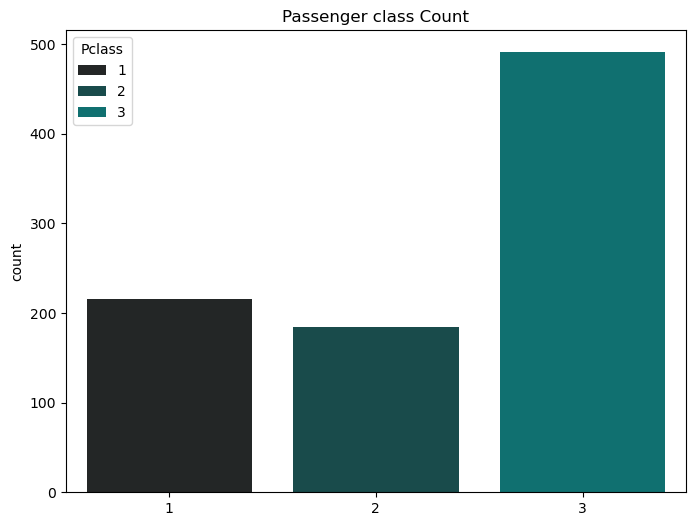

In [10]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x="Pclass", color="teal", hue="Pclass")
plt.xlabel("")
plt.title("Passenger class Count")

plt.show()

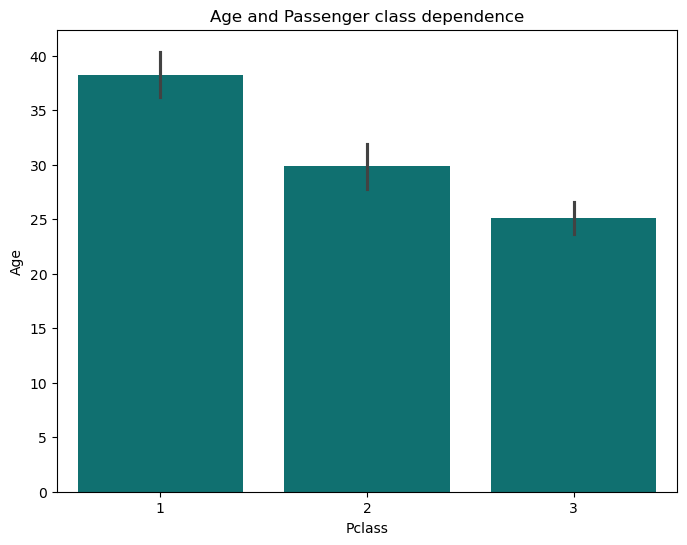

In [11]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_train, x = "Pclass", y ="Age", color="teal")
plt.title("Age and Passenger class dependence")

plt.show()

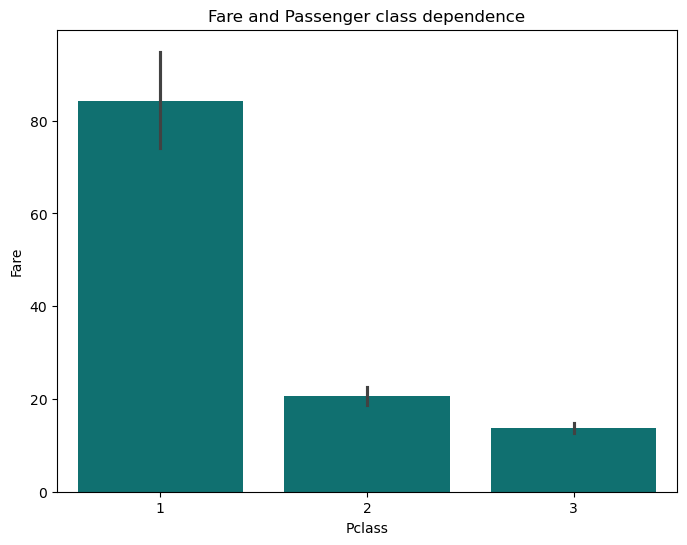

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_train, x="Pclass", y = "Fare", color="teal")
plt.title("Fare and Passenger class dependence")

plt.show()

Text(0.5, 1.0, 'ln(Fare) distribution')

<Figure size 800x600 with 0 Axes>

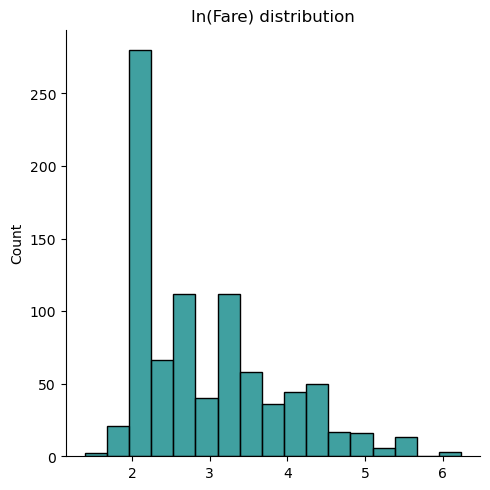

In [13]:
plt.figure(figsize=(8, 6))
sns.displot(data=df_train, x=np.log(df_train.Fare), color="teal")
plt.xlabel("")
plt.title("ln(Fare) distribution")

## Filling NA in dataset

In [14]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
df_train_copy = df_train.drop("Cabin", axis = 1)
df_train_copy.Age.fillna(df_train_copy.Age.median(), inplace=True)
df_train_copy.Embarked.fillna(df_train_copy.Embarked.mode()[0], inplace=True)

In [16]:
df_train_copy.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Figure size 800x600 with 0 Axes>

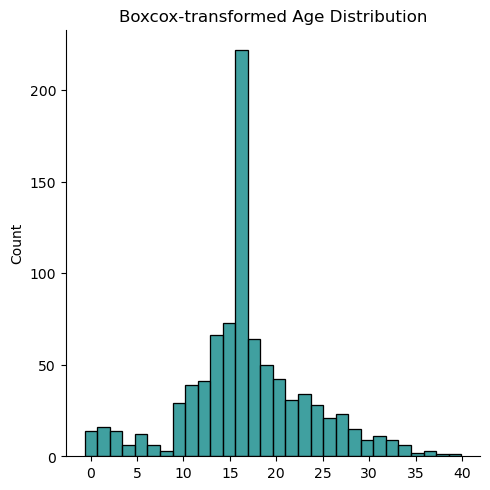

In [17]:
from scipy.stats import boxcox

df_train_copy["Age"], best_lambda = boxcox(df_train_copy["Age"])

plt.figure(figsize=(8, 6))
sns.displot(data=df_train_copy, x = "Age", color="teal")
plt.xlabel("")
plt.title("Boxcox-transformed Age Distribution")

plt.show()

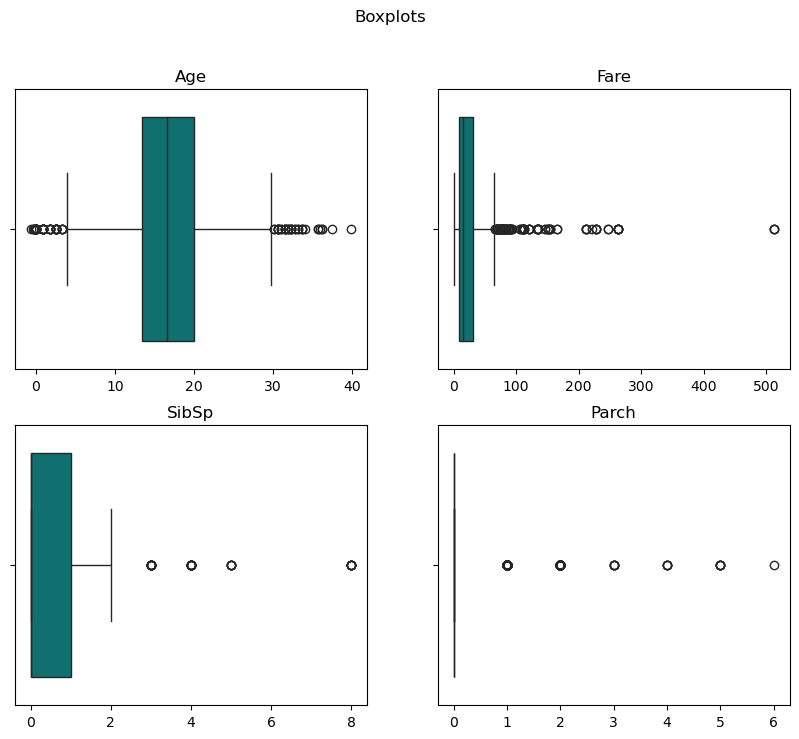

In [18]:
plt.figure(figsize=(10, 8))
plt.suptitle("Boxplots")

plt.subplot(2, 2, 1)
fig = sns.boxplot(data=df_train_copy, x="Age", color="teal")
fig.set_title("Age")
fig.set_xlabel("")

plt.subplot(2, 2, 2)
fig = sns.boxplot(data=df_train_copy, x="Fare", color="teal")
fig.set_title("Fare")
fig.set_xlabel("")

plt.subplot(2, 2, 3)
fig = sns.boxplot(data=df_train_copy, x = "SibSp", color="teal")
fig.set_title("SibSp")
fig.set_xlabel("")

plt.subplot(2, 2, 4)
fig = sns.boxplot(data=df_train_copy, x="Parch", color="teal")
fig.set_title("Parch")
fig.set_xlabel("")

plt.show()

## Computing IQR for each outliers

In [19]:
IQR = df_train_copy.Age.quantile(0.75) - df_train_copy.Age.quantile(0.25)
lower_fence = df_train_copy.Age.quantile(0.25) - 1.5*IQR
upper_fence = df_train_copy.Age.quantile(0.75) + 1.5*IQR
print("Outliers for {} are in range: {} < and > {}".format("Age", lower_fence, upper_fence))

Outliers for Age are in range: 3.586132376075538 < and > 29.938095314306317


In [20]:
IQR = df_train_copy.Fare.quantile(0.75) - df_train_copy.Fare.quantile(0.25)
lower_fence = df_train_copy.Fare.quantile(0.25) - 1.5*IQR
upper_fence = df_train_copy.Fare.quantile(0.75) + 1.5*IQR
print("Outliers for {} are in range: {} > or > {}".format("Fare", lower_fence, upper_fence))

Outliers for Fare are in range: -26.724 > or > 65.6344


In [21]:
IQR = df_train_copy.SibSp.quantile(0.75) - df_train_copy.SibSp.quantile(0.25)
lower_fence = df_train_copy.SibSp.quantile(0.25) - 1.5*IQR
upper_fence = df_train_copy.SibSp.quantile(0.75) + 1.5*IQR
print("Outliers for {} are in range: {} < or > {}".format("SibSp", lower_fence, upper_fence)) 

Outliers for SibSp are in range: -1.5 < or > 2.5


In [22]:
IQR = df_train_copy.Parch.quantile(0.75) - df_train_copy.Parch.quantile(0.25)
lower_fence = df_train_copy.Parch.quantile(0.25) - 1.5*IQR
upper_fence = df_train_copy.Parch.quantile(0.75) + 1.5*IQR 
print("Outliers for {} are in range: < {} or > {}".format("Parch", lower_fence, upper_fence))

Outliers for Parch are in range: < 0.0 or > 0.0


In [23]:
df_train_copy.Age = np.where(df_train_copy.Age > 29.93, 29.93, df_train_copy.Age)
df_train_copy.Age = np.where(df_train_copy.Age < 3.58, 3.58, df_train_copy.Age)

df_train_copy.Fare = np.where(df_train_copy.Fare > 65.63, 65.63, df_train_copy.Fare)

df_train_copy.SibSp = np.where(df_train_copy.SibSp > 2.5, 2.5, df_train_copy.SibSp)

ValueError: Cannot mask with non-boolean array containing NA / NaN values

<Figure size 800x600 with 0 Axes>

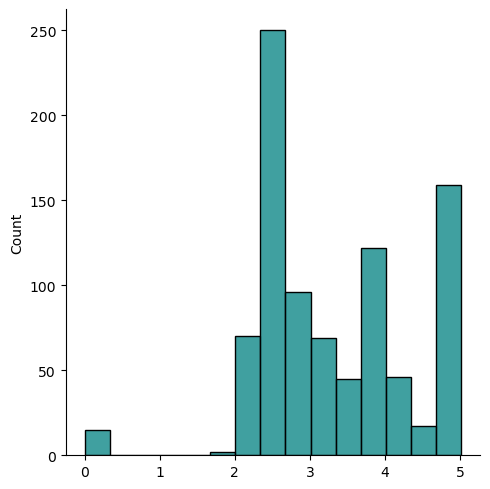

In [24]:
transformed_fare, best_lambda = boxcox(df_train_copy.Fare + 1)

plt.figure(figsize=(8, 6))
sns.displot(data=df_train_copy, x=transformed_fare, color="teal")
plt.xlabel("")
plt.title("Boxcox-transformed Fare Distribution")

plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

In [26]:
dtc = DecisionTreeClassifier()
dtc_params = {'max_features': ['sqrt', 'log2'], "criterion": ["gini", "entropy"], "ccp_alpha": [0.1, 0.01, 0.001], "max_depth": range(1, 11)}
dtc_searcher = GridSearchCV(estimator=dtc, param_grid=dtc_params, cv=5, verbose=True)

In [27]:
y_train = df_train_copy['Survived'].copy()
X_train = df_train_copy.drop(['Survived', 'PassengerId', 'Name', 'Parch', 'Ticket', 'Embarked'], axis=1)
X_test = df_test
X_train.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,male,13.468118,1.0,7.250
1,1,female,21.498727,1.0,65.630
2,3,female,15.563416,0.0,7.925
3,1,female,20.056109,1.0,53.100
4,3,male,20.056109,0.0,8.050


In [28]:
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
num_cols = X_train.select_dtypes(exclude=["object", "category"]).columns
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns

In [30]:
pl = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
])

full_compose = ColumnTransformer([
    ("num", pl, num_cols),
    ("cat", OneHotEncoder(), cat_cols)
])

x_train = full_compose.fit_transform(X_train)
x_test = full_compose.fit_transform(X_test)
print(X_train.shape, y_train.shape, X_test.shape)

(891, 5) (891,) (418, 11)


In [31]:
dtc_searcher.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 11),
                         'max_features': ['sqrt', 'log2']},
             verbose=True)

In [32]:
final_model = dtc_searcher.best_estimator_
preds = final_model.predict(x_train)
accuracy_score(preds, y_train)

0.8787878787878788

In [33]:
y_preds = final_model.predict(x_test)
res_dict = {"PassengerId": df_test["PassengerId"],
            "Survived": y_preds}

res_df = pd.DataFrame(res_dict)
res_df.to_csv("result.csv", index=False)

In [40]:
final_pipeline = Pipeline([
    ("compose", full_compose),
    ("model", final_model)
])

final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('compose',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Pclass', 'Age', 'SibSp', 'Fare'], dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  Index(['Sex'], dtype='object'))])),
                ('model',
                 DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10,
                                        max_features='sqrt'))])

In [42]:
joblib.dump(final_pipeline, "pipeline.pkl")

['pipeline.pkl']

In [36]:
X_train.head()

,Pclass,Sex,Age,SibSp,Fare
0,3,male,13.468118,1.0,7.250
1,1,female,21.498727,1.0,65.630
2,3,female,15.563416,0.0,7.925
3,1,female,20.056109,1.0,53.100
4,3,male,20.056109,0.0,8.050
